<a href="https://colab.research.google.com/github/Duwaysan/T5_Week2_Project/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [563]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [564]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [565]:
df['Accident_severity'].value_counts()

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [567]:
df.shape

(12316, 32)

In [568]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [569]:
df.sample(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4739,3:20:00,Sunday,18-30,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,2-5yrs,...,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,No priority to vehicle,Serious Injury
72,11:02:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
1624,15:03:00,Tuesday,Over 51,Male,Elementary school,Owner,Above 10yr,Long lorry,Owner,Unknown,...,Going straight,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


In [570]:
df.tail()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [571]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [572]:
df.duplicated().sum()

0

In [573]:
df.isnull().sum() #many nulls

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [575]:
df['Time'] = df['Time'].astype('datetime64[ns]')
df['hour']= df['Time'].dt.hour                #dividing time series
df['minute']= df['Time'].dt.minute
df['second']= df['Time'].dt.second
df.drop('Time', axis=1, inplace=True)


<ipython-input-575-229cf0720fde>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = df['Time'].astype('datetime64[ns]')


In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [577]:
for col in df.columns:  #removing '?' from some entries (Type_of_Vehicle)
  if df[col].dtype == 'object':
    df[col] = df[col].str.replace('?','')

In [578]:
df['hour'] = df['hour'].astype('category')
df['minute'] = df['minute'].astype('category')
df['second'] = df['second'].astype('category')

#now the rest of datatypes are categorical, we do for loop
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')

for col in df.columns:
  if df[col].dtype == 'int64':
    df[col] = df[col].astype('int32') #saving memory

In [579]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute,second
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2,0
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2,0
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41100Q),Owner,NaN,No defect,...,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2,0
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6,0
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6,0


In [580]:
df.info() #now all datatypes are in place, time to fix missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Day_of_week                  12316 non-null  category
 1   Age_band_of_driver           12316 non-null  category
 2   Sex_of_driver                12316 non-null  category
 3   Educational_level            11575 non-null  category
 4   Vehicle_driver_relation      11737 non-null  category
 5   Driving_experience           11487 non-null  category
 6   Type_of_vehicle              11366 non-null  category
 7   Owner_of_vehicle             11834 non-null  category
 8   Service_year_of_vehicle      8388 non-null   category
 9   Defect_of_vehicle            7889 non-null   category
 10  Area_accident_occured        12077 non-null  category
 11  Lanes_or_Medians             11931 non-null  category
 12  Road_allignment              12174 non-null  category
 13  T

In [581]:
#before filling with mode we need to check if there's a column with mode na, missing value,or Unknown
for col in df.columns:
  if df[col].dtype == 'category':
    print(col,':',df[col].mode()[0])                        #in some enteries we have 'Unknown' and 'Other' Therefore, we have to fill one of them (Unknown)
    print('-------------------------')

  elif df[col].dtype == 'int32':
    print(col,':',df[col].mean())
    print('-------------------------')

Day_of_week : Friday
-------------------------
Age_band_of_driver : 18-30
-------------------------
Sex_of_driver : Male
-------------------------
Educational_level : Junior high school
-------------------------
Vehicle_driver_relation : Employee
-------------------------
Driving_experience : 5-10yr
-------------------------
Type_of_vehicle : Automobile
-------------------------
Owner_of_vehicle : Owner
-------------------------
Service_year_of_vehicle : Unknown
-------------------------
Defect_of_vehicle : No defect
-------------------------
Area_accident_occured : Other
-------------------------
Lanes_or_Medians : Two-way (divided with broken lines road marking)
-------------------------
Road_allignment : Tangent road with flat terrain
-------------------------
Types_of_Junction : Y Shape
-------------------------
Road_surface_type : Asphalt roads
-------------------------
Road_surface_conditions : Dry
-------------------------
Light_conditions : Daylight
-------------------------
We

#From last cell we know that:
- Mode of 'Age_band_of_casualty': **na**
- Mode of 'Service_year_of_vehicle': **Unknown** ; we will use 'Other'
## These two values are considered missing values along with NaN

In [582]:
#Dealing with null modes
real_mode = df[df['Age_band_of_casualty'] != 'na']['Age_band_of_casualty'].mode()[0]    #take the mode but na
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('na', real_mode)
real_mode = df[df['Service_year_of_vehicle'] != 'Unknown']['Service_year_of_vehicle'].mode()[0]   #take the mode but Unknown
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace('Unknown', real_mode)
#--------------------------------------------------------------------------------------------------------
for col in df.columns:
  if df[col].dtype == 'category':
   df[col] = df[col].fillna(df[col].mode()[0])
   df[col] = df[col].replace('na', df[col].mode()[0])
   df[col] = df[col].replace('Unknown', df[col].mode()[0])
  elif df[col].dtype == 'int32':
    df[col] = df[col].fillna(df[col].mean())

In [583]:
df.isna().sum().sum() #no nulls

0

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Day_of_week                  12316 non-null  category
 1   Age_band_of_driver           12316 non-null  category
 2   Sex_of_driver                12316 non-null  category
 3   Educational_level            12316 non-null  category
 4   Vehicle_driver_relation      12316 non-null  category
 5   Driving_experience           12316 non-null  category
 6   Type_of_vehicle              12316 non-null  category
 7   Owner_of_vehicle             12316 non-null  category
 8   Service_year_of_vehicle      12316 non-null  category
 9   Defect_of_vehicle            12316 non-null  category
 10  Area_accident_occured        12316 non-null  category
 11  Lanes_or_Medians             12316 non-null  category
 12  Road_allignment              12316 non-null  category
 13  T

In [585]:
# Creating new features
accident_count_per_cause = df.groupby('Cause_of_accident')['Cause_of_accident'].count() #Number of accident
Number_of_casualties_per_accident = df.groupby('Cause_of_accident')['Number_of_casualties'].sum() # most casualties comes with which type of accident
percentage_gender_accident = df['Sex_of_driver'].value_counts()
print(Number_of_casualties_per_accident,':')
print('---------------------------')
print(accident_count_per_cause,':')
print('---------------------------')

print(percentage_gender_accident)


Cause_of_accident
Changing lane to the left               2348
Changing lane to the right              2851
Driving at high speed                    260
Driving carelessly                      2160
Driving to the left                      450
Driving under the influence of drugs     551
Drunk driving                             50
Getting off the vehicle improperly       286
Improper parking                          50
Moving Backward                         1748
No distancing                           3496
No priority to pedestrian               1042
No priority to vehicle                  1885
Other                                    720
Overloading                               90
Overspeed                                 92
Overtaking                               661
Overturning                              207
Turnover                                 120
Name: Number_of_casualties, dtype: int32 :
---------------------------
Cause_of_accident
Changing lane to the left             

<ipython-input-585-cfdf7bb877db>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_count_per_cause = df.groupby('Cause_of_accident')['Cause_of_accident'].count() #Number of accident
<ipython-input-585-cfdf7bb877db>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Number_of_casualties_per_accident = df.groupby('Cause_of_accident')['Number_of_casualties'].sum() # most casualties comes with which type of accident


In [586]:
percentage_gender_accident

,count
Sex_of_driver,
Male,11615
Female,701


In [587]:
num_cols = ['Number_of_vehicles_involved','Number_of_casualties']
cat_cols = df.drop(num_cols, axis=1).columns
cat_ordinal = ['Age_band_of_driver', 'Educational_level', 'Driving_experience', 'Service_year_of_vehicle', 'Age_band_of_casualty', 'Casualty_severity', 'Accident_severity']
cat_nominal = cat_cols.drop(cat_ordinal)

In [588]:
scaler = StandardScaler()
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

for col in num_cols:
  df[col] = scaler.fit_transform(df[[col]])

for col in cat_ordinal:
  df[col] = label_encoder.fit_transform(df[col])

for col in cat_nominal:
    encoded_cols = one_hot_encoder.fit_transform(df[[col]])                             #encoding each column seperately then concatenat
    encoded_col_names = one_hot_encoder.get_feature_names_out([col])
    encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names, index=df.index)
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(col, axis=1, inplace=True)                                                    #drop the original column


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [589]:
df

,Age_band_of_driver,Educational_level,Driving_experience,Service_year_of_vehicle,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Casualty_severity,Accident_severity,Day_of_week_Monday,...,minute_50,minute_51,minute_52,minute_53,minute_54,minute_55,minute_56,minute_57,minute_58,minute_59
0,0,0,0,3,-0.059061,0.448649,0,2,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,3,2,-0.059061,0.448649,0,2,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,4,0,1,-0.059061,0.448649,1,2,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,4,2,1,-0.059061,0.448649,0,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4,1,2,-0.059061,0.448649,0,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,4,1,1,-0.059061,-0.544264,0,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12312,0,1,2,1,-0.059061,-0.544264,0,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12313,2,4,2,1,-1.510942,-0.544264,1,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12314,0,4,3,1,-0.059061,-0.544264,0,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [590]:
df['Age_band_of_driver'].value_counts()

,count
Age_band_of_driver,
0,5819
1,4087
2,1585
3,825


In [591]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in df.columns:  #removing outliers
  df_no_outliers = remove_outliers(df, col)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

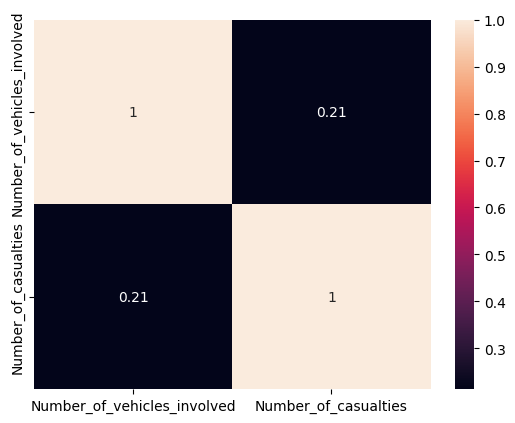

In [592]:
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, )
plt.show()

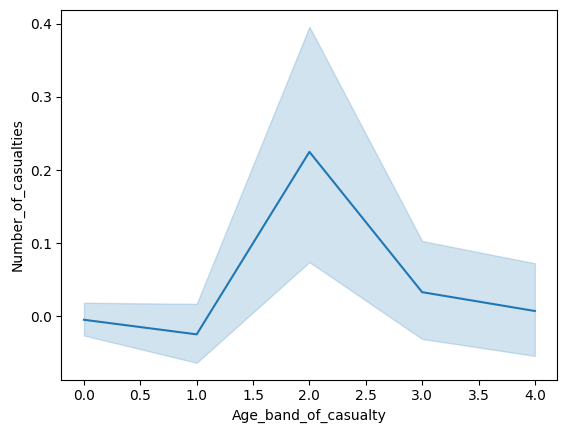

In [593]:
sns.lineplot(data=df, x='Age_band_of_casualty', y='Number_of_casualties')
plt.show()

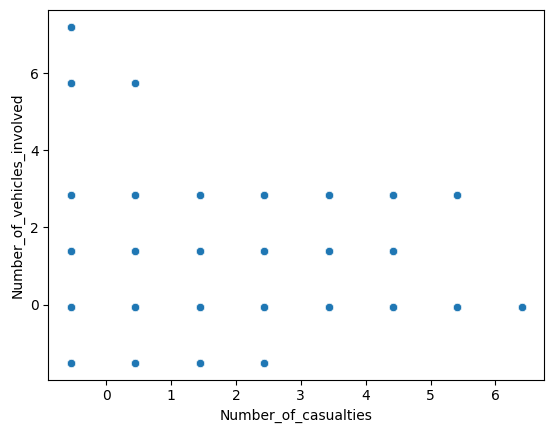

In [594]:
sns.scatterplot(data=df, x='Number_of_casualties', y='Number_of_vehicles_involved')
plt.show()

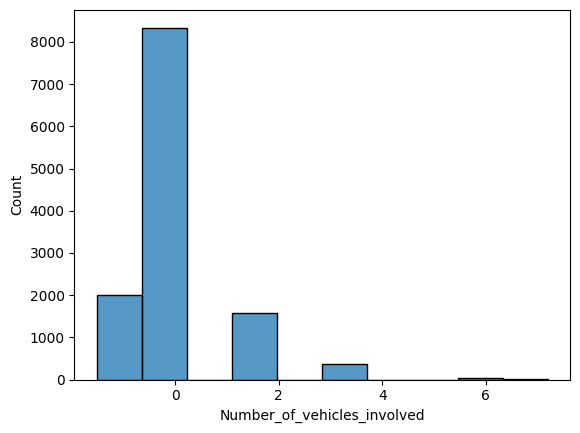

In [595]:
sns.histplot(data=df, x='Number_of_vehicles_involved',bins =10)
plt.show()

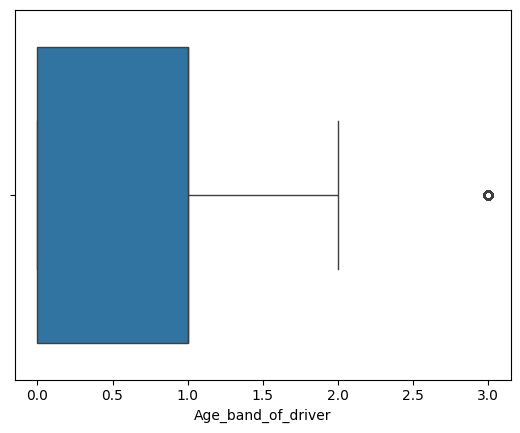

In [596]:
sns.boxplot(data=df, x='Age_band_of_driver')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [597]:
train_x, test_x, train_y, test_y = train_test_split(df.drop('Accident_severity', axis=1), df['Accident_severity'], random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [598]:
model = LogisticRegression()
model.fit(train_x, train_y)
y_pred_logistic = model.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [599]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
y_pred_decision_tree = model.predict(test_x)

#### Support Vector Machine (SVM)

In [600]:
model = SVC()
model.fit(train_x, train_y)
y_pred_svm = model.predict(test_x)

#### K-Neighbors Classifier

In [601]:
mode = KNeighborsClassifier()
model.fit(train_x, train_y)
y_pred_knn = model.predict(test_x)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [602]:
confusion_matrix = confusion_matrix(test_y, y_pred_svm)
accuracy_score = accuracy_score(test_y, y_pred_logistic)
precision_score = precision_score(test_y, y_pred_decision_tree, average='weighted')
recall_score = recall_score(test_y, y_pred_knn, average='weighted')
f1_score = f1_score(test_y, y_pred_logistic, average='weighted')
roc_curve = roc_curve(test_y, y_pred_logistic, pos_label='Accident_severity')
fpr, tpr, thresholds = roc_curve
auc_score = auc(fpr, tpr)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [603]:

 print('Confusion matrix score: \n',confusion_matrix)


 print('Accuracy score: ',accuracy_score*100)

 print('Precision score: ',precision_score*100)

 print('Recall score: ',recall_score*100)


 print('F1 score: ',f1_score*100)

 print('ROC curve: ',roc_curve*100)
 print('AUC: ',auc_score)

Confusion matrix score: 
 [[   0    0   46]
 [   0    0  463]
 [   0    0 2570]]
Accuracy score:  83.66352711919454
Precision score:  77.75276901674793
Recall score:  83.46865865540761
F1 score:  76.67098221365606
ROC curve:  (array([0.        , 0.99480351, 0.99870088, 1.        ]), array([nan, nan, nan, nan]), array([inf,  2.,  1.,  0.]), array([0.        , 0.99480351, 0.99870088, 1.        ]), array([nan, nan, nan, nan]), array([inf,  2.,  1.,  0.]), array([0.        , 0.99480351, 0.99870088, 1.        ]), array([nan, nan, nan, nan]), array([inf,  2.,  1.,  0.]), array([0.        , 0.99480351, 0.99870088, 1.        ]), array([nan, nan, nan, nan]), array([inf,  2.,  1.,  0.]), array([0.        , 0.99480351, 0.99870088, 1.        ]), array([nan, nan, nan, nan]), array([inf,  2.,  1.,  0.]), array([0.        , 0.99480351, 0.99870088, 1.        ]), array([nan, nan, nan, nan]), array([inf,  2.,  1.,  0.]), array([0.        , 0.99480351, 0.99870088, 1.        ]), array([nan, nan, nan, nan]

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Speaking of data there is a huge loss in data, missing values comes in multiple format (NaN,Unknown,unknown,na) which makes it difficult to process
----------------
speaking of features, some existed features are  not usefull in my opinion for example 'Service_year_of_Vehicle'
-------
but in the other hand we can extract many useful features such as casuality percentage per gender, average number of accidents per day, accident hours, casuality per band of age, and many others
-----
in my opinion the most important feature is the band age of driver because people on different ages act very different also the age increases year after year without decreasing
---------
when it comes to to comparing metrics i would choose f1-score, because it helps when data is not equally distributed, in our case we have:
--------
- Slight Injury 10415
- Serious Injury 1743
- Fatal injury 158

definetly not equally distributed
my job is already perfect no need for improvments😎